In [17]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('conversion.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
# ad_id – идентификатор объявления (рекламы)
# xyz_campaign_id – идентификатор рекламной кампании в базе компании X
# fb_campaign_id – идентификатор кампании в Facebook
# age – возрастная группа, которой показывалась реклама
# gender – пол тех, кому показывалась реклама
# interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)
# impressions – число показов
# clicks – число кликов
# spent – сумма, которую компания потратила на показ объявления 
# total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
# approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
df.shape

(1143, 11)

In [7]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [11]:
df.isnull().sum(axis=0)

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [15]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [22]:
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

In [ ]:
# 2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

<Figure size 864x720 with 0 Axes>

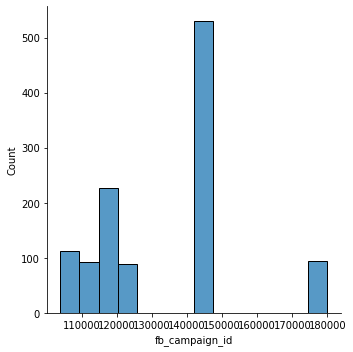

In [37]:
plt.figure(figsize=(12, 10))
sns.displot(data=np.log(df.groupby('fb_campaign_id').Impressions.sum()), x=df['fb_campaign_id'])

In [ ]:
# Распределение:
# не является номальным 
# бимодальное

In [ ]:
# 3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
# CTR (click-through rate) =  clicks ÷ impressions

In [25]:
df['CTR'] = df['Clicks'] / df['Impressions']
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [40]:
# ad_id объявления с наибольшим CTR
df.sort_values('CTR', ascending=False).head(1).ad_id

150    738637
Name: ad_id, dtype: int64

In [26]:
# Описательные статистики
df['CTR'].describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

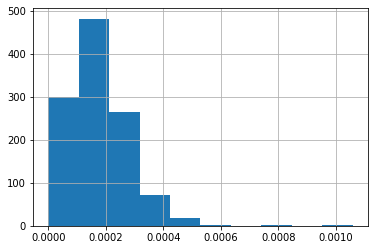

In [28]:
# Распределение - гистоограмма
df['CTR'].hist()

In [29]:
# 4. Проанализируйте CTR с разбивкой по рекламной кампании.

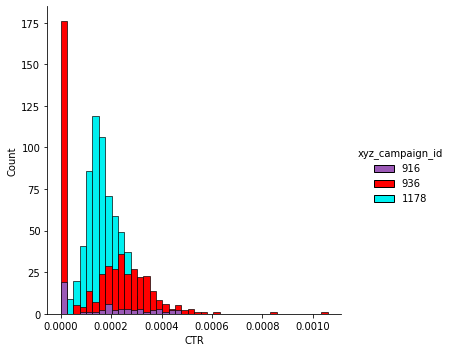

In [45]:
sns.displot(data=df, x=df['CTR'], hue=df['xyz_campaign_id'], palette=["#9b59b6", "#ff0000", "#00f0f0"], alpha=1)
# alpha - saturation (прозрачность цветов)

In [34]:
# 5.Посчитайте стоимость за клик пользователя по объявлению (CPC). 
# Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 

In [46]:
# CPC (cost-per-click) = spent / clicks

In [54]:
df['CPC'] = df.Spent / df.Clicks

In [55]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [56]:
df['CPC'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [63]:
df['CPC'].isnull().sum(axis=0) # NaN

207

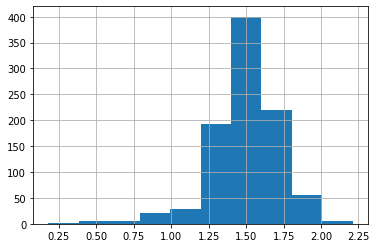

In [59]:
df['CPC'].dropna().hist() # drop NaN

In [65]:
st.iqr(df['CPC'], nan_policy='omit')

0.25436369905

In [66]:
# 6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 

<Figure size 720x720 with 0 Axes>

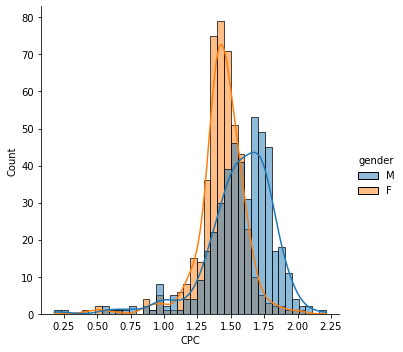

In [69]:
plt.figure(figsize=(10, 10))
sns.displot(data=df, x=df['CPC'].dropna(), hue='gender', kde=True)
# kde - огибающая линия на гистограмме

In [70]:
# 7. Посчитайте конверсию из клика в покупку

In [71]:
# Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, 
# к общему числу тех, кто дошел до данного этапа.

In [73]:
adv_id = 1121814

In [74]:
df['conversion_rate'] = df['Approved_Conversion'] / df['Clicks']

In [75]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conversion_rate
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,1.0


In [82]:
df.query('ad_id == 1121814').conversion_rate.mul(100).round(2)

860    3.09
Name: conversion_rate, dtype: float64